In [429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [430]:
df=pd.read_excel('Final_Train.xlsx')

In [431]:
dft=pd.read_excel('Final_Test.xlsx')

In [432]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


We have 5961 Rows and 7 columns here.

In [433]:
dft

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


We have 1987 rows and 6 columns in the doctors data

In [434]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

To get a clarity let us begin with changing the experience columns in test and train to values.

In [435]:
df['Experience'] = df['Experience'].str.split().str[0]
dft['Experience'] = dft['Experience'].str.split().str[0]

In [436]:
df.isna().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [437]:
dft.isna().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In Ratings and misc_info, we are able to see a huge na values, let us first move ahead and impute the place column which is having a lower na values

Place.

In [438]:
df['Place'].fillna('None,None',inplace=True)
dft['Place'].fillna('None,None',inplace=True)

mReplaced places Na in places with None as we cannot take any random cities name.

Now we are going separate the comma separated two types-city and area.

In [439]:
df['Area']=df['Place'].str.rsplit(',',1).str.get(0)
df['City']=df['Place'].str.rsplit(',',1).str.get(1)

In [440]:
dft['Area']=dft['Place'].str.rsplit(',',1).str.get(0)
dft['City']=dft['Place'].str.rsplit(',',1).str.get(1)

In [441]:
df.isna().sum()

Qualification            0
Experience               0
Rating                3302
Place                    0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
Area                     0
City                     1
dtype: int64

In [442]:
dft.isna().sum()

Qualification            0
Experience               0
Rating                1090
Place                    0
Profile                  0
Miscellaneous_Info     834
Area                     0
City                     0
dtype: int64

Now in city in train, we have 1 Row as null, let us make the city and area for that as none as we did above.

In [443]:
df.loc[df['City'].isnull(),'Area']='None'
df['City']=df['City'].fillna('None')

In [444]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                    0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
Area                     0
City                     0
dtype: int64

The city is now cleaned.

In [445]:
df.drop(columns='Place',inplace=True)
dft.drop(columns='Place',inplace=True)

In [446]:
df

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City
0,"BHMS, MD - Homeopathy",24,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100%,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai
...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98%,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Basavanagudi,Bangalore
5957,MBBS,33,NaN,General Medicine,NaN,100,Nungambakkam,Chennai
5958,MBBS,41,97%,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Greater Kailash Part 2,Delhi
5959,"MBBS, MD - General Medicine",15,90%,General Medicine,General Medical Consultation Viral Fever Treat...,100,Vileparle West,Mumbai


we have removed the place column and now we have Area and city segregated.

Moving ahead to clean the qualification data.

In [447]:
df['Qualification'].value_counts()[:40]

BDS                                                      488
BHMS                                                     477
BAMS                                                     471
MBBS                                                     334
MBBS, MS - ENT                                           220
MBBS, MD - Dermatology                                   178
MBBS, MD - General Medicine                              177
MBBS, MD - Dermatology , Venereology & Leprosy           140
BHMS, MD - Homeopathy                                     93
MBBS, DDVL                                                92
MBBS, Diploma in Otorhinolaryngology (DLO)                84
BAMS, MD - Ayurveda Medicine                              82
BDS, MDS - Conservative Dentistry & Endodontics           68
MBBS, DDV                                                 66
BDS, MDS                                                  63
BDS, MDS - Oral & Maxillofacial Surgery                   57
MD - Dermatology , Vener

To get the top 40 qualification I have used [:40] and got the top qualaifications to work with them and segregate the data.

As there are many to segregate, we will get the top 15data and then move ahead splitting the data.

In [448]:
df["Qualification"]=df["Qualification"].str.split(",")
Qualification ={}
for x in df["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1
            
print(Qualification)


{'BHMS': 749, 'MD - Homeopathy': 181, 'BAMS': 764, 'MD - Ayurveda Medicine': 139, 'MBBS': 2808, 'MS - Otorhinolaryngology': 103, 'BSc - Zoology': 3, 'BDS': 1363, 'MD - General Medicine': 285, 'BSc': 3, 'MS': 2, 'DNB - ENT': 111, 'MDS': 82, 'MDS - Oral & Maxillofacial Surgery': 104, 'Diploma in Otorhinolaryngology (DLO)': 250, 'MF- Homeopathy': 5, 'MS - ENT': 411, 'DNB': 58, 'Fellowship of College of General Practice (FCGP)': 13, 'DDVL': 161, 'IBCLC (USA)': 1, 'Post Graduate Diploma in Diabetology (PGDD)': 53, 'Diploma in Dermatology': 67, 'Fellowship in Aesthetic Medicine': 23, 'DM - Neurology': 6, 'MD - Pediatrics': 13, 'Fellowship in Cleft Lip and Craniofacial Surgery': 1, 'Diploma in Cosmetology': 3, 'AFIH': 4, 'MDS - Prosthodontist And Crown Bridge': 45, 'M. D. Hom. (Practice of Medicine)': 2, 'Diploma in Emergency Medicine': 8, 'Diploma in Counselling Skills': 2, 'DHMS (Diploma in Homeopathic Medicine and Surgery)': 47, 'MD - Dermatology': 606, 'Venereology & Leprosy': 297, 'MDS -

We have created a dictionary here to assign each with a single qualification and now we will segregate them.

We will not get the top 15 qualifications to work with.

In [449]:
most_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:15]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy', 'DDVL', 'MD - Ayurveda Medicine', 'DDV', 'DNB - ENT', 'MDS - Conservative Dentistry & Endodontics']


Now we will create a new column with these data encode the section with the data we have got.

In [450]:
for qual in final_qual:
    df[qual] = 0

for x,y in zip(df['Qualification'].values, np.array([i for i in range(len(df))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            df[c][y] = 1

In [451]:
df

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City,MBBS,BDS,...,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics
0,"[BHMS, MD - Homeopathy]",24,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,...,0,0,0,0,1,0,0,0,0,0
1,"[BAMS, MD - Ayurveda Medicine]",12,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,...,0,0,0,0,0,0,1,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",9,NaN,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,...,0,0,0,0,0,0,0,0,0,0
3,"[BSc - Zoology, BAMS]",12,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,...,0,0,0,0,0,0,0,0,0,0
4,[BAMS],20,100%,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"[MBBS, MS - ENT]",19,98%,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Basavanagudi,Bangalore,1,0,...,1,0,0,0,0,0,0,0,0,0
5957,[MBBS],33,NaN,General Medicine,NaN,100,Nungambakkam,Chennai,1,0,...,0,0,0,0,0,0,0,0,0,0
5958,[MBBS],41,97%,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Greater Kailash Part 2,Delhi,1,0,...,0,0,0,0,0,0,0,0,0,0
5959,"[MBBS, MD - General Medicine]",15,90%,General Medicine,General Medical Consultation Viral Fever Treat...,100,Vileparle West,Mumbai,1,0,...,0,0,1,0,0,0,0,0,0,0


In [452]:
df.isnull().sum()

Qualification                                    0
Experience                                       0
Rating                                        3302
Profile                                          0
Miscellaneous_Info                            2620
Fees                                             0
Area                                             0
City                                             0
MBBS                                             0
BDS                                              0
BAMS                                             0
BHMS                                             0
MD - Dermatology                                 0
MS - ENT                                         0
Venereology & Leprosy                            0
MD - General Medicine                            0
Diploma in Otorhinolaryngology (DLO)             0
MD - Homeopathy                                  0
DDVL                                             0
MD - Ayurveda Medicine         

Doing the same with test as well.

We have already created a dictionary in the df data and now we havae to get the same columns here in test as well and hencce using the same to impute in the test data as well.

In [453]:
most_qual = sorted(Qualification.items(), key=lambda x:x[1], reverse=True)[:15]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
for title in final_qual:
    dft[title] = 0


In [454]:
for x,y in zip(dft['Qualification'].values, np.array([i for i in range(len(dft))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            dft[c][y] = 1

In [455]:
dft

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Area,City,MBBS,BDS,BAMS,...,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics
0,MBBS,35,NaN,General Medicine,NaN,Ghatkopar East,Mumbai,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,ENT Specialist,NaN,West Marredpally,Hyderabad,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"MBBS, DDVL",40,70%,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BAMS,0,NaN,Ayurveda,NaN,New Ashok Nagar,Delhi,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100%,Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,NaN,Ayurveda,NaN,Basavanagudi,Bangalore,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,NaN,Dermatologists,NaN,Choolai,Chennai,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,NaN,General Medicine,NaN,Porur,Chennai,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1985,BDS,12,98%,Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,Arekere,Bangalore,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we have the same data in train and test.


Removing qualaification column from df and dft

In [456]:
df=df.drop(columns='Qualification')
dft=dft.drop(columns='Qualification')

Ratings:

As the rating column has many null values we are going to put-9% and afterwards we are going to change those percentages into numerical values.



In [457]:
df['Rating'].fillna('-9%',inplace=True)
dft['Rating'].fillna('-9%',inplace=True)

for i in df['Rating'].value_counts().index:
    df['Rating'].replace(i,int(i[:-1]),inplace=True)

for i in dft['Rating'].value_counts().index:
    dft['Rating'].replace(i,int(i[:-1]),inplace=True)

Now let us create bins and get the ratings from 0-100 for a better clarity.

In [458]:
bins = [-10,0,10,20,30,40,50,60,70,80,90,100]

labels = [i for i in range(11)]
df['Rating'] = pd.cut(df['Rating'], bins=bins, labels=labels, include_lowest=True)

In [459]:
df

,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City,MBBS,BDS,BAMS,...,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,10,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Basavanagudi,Bangalore,1,0,0,...,1,0,0,0,0,0,0,0,0,0
5957,33,0,General Medicine,NaN,100,Nungambakkam,Chennai,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5958,41,10,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Greater Kailash Part 2,Delhi,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5959,15,9,General Medicine,General Medical Consultation Viral Fever Treat...,100,Vileparle West,Mumbai,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [460]:
df['Rating'].value_counts()

0     3302
10    2222
9      280
8       98
7       32
6       19
4        4
5        3
1        1
2        0
3        0
Name: Rating, dtype: int64

In [461]:
bins = [-10,0,10,20,30,40,50,60,70,80,90,100]

labels = [i for i in range(11)]
dft['Rating'] = pd.cut(dft['Rating'], bins=bins, labels=labels, include_lowest=True)

Changed the details of Ratings in train and test

Dropping misc column as most of the values are null and not much information can be gained.

In [462]:
df=df.drop(columns='Miscellaneous_Info')
dft=dft.drop(columns='Miscellaneous_Info')

In [463]:
df


,Experience,Rating,Profile,Fees,Area,City,MBBS,BDS,BAMS,BHMS,...,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics
0,24,10,Homeopath,100,Kakkanad,Ernakulam,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,12,10,Ayurveda,350,Whitefield,Bangalore,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,9,0,ENT Specialist,300,Mathikere - BEL,Bangalore,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,250,Bannerghatta Road,Bangalore,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,20,10,Ayurveda,250,Keelkattalai,Chennai,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,10,ENT Specialist,300,Basavanagudi,Bangalore,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5957,33,0,General Medicine,100,Nungambakkam,Chennai,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5958,41,10,General Medicine,600,Greater Kailash Part 2,Delhi,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5959,15,9,General Medicine,100,Vileparle West,Mumbai,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [464]:
df.dtypes

Experience                                      object
Rating                                        category
Profile                                         object
Fees                                             int64
Area                                            object
City                                            object
MBBS                                             int64
BDS                                              int64
BAMS                                             int64
BHMS                                             int64
MD - Dermatology                                 int64
MS - ENT                                         int64
Venereology & Leprosy                            int64
MD - General Medicine                            int64
Diploma in Otorhinolaryngology (DLO)             int64
MD - Homeopathy                                  int64
DDVL                                             int64
MD - Ayurveda Medicine                           int64
DDV       

In [465]:
df.nunique()

Experience                                     64
Rating                                          9
Profile                                         6
Fees                                           40
Area                                          867
City                                            9
MBBS                                            2
BDS                                             2
BAMS                                            2
BHMS                                            2
MD - Dermatology                                2
MS - ENT                                        2
Venereology & Leprosy                           2
MD - General Medicine                           2
Diploma in Otorhinolaryngology (DLO)            2
MD - Homeopathy                                 2
DDVL                                            2
MD - Ayurveda Medicine                          2
DDV                                             2
DNB - ENT                                       2


Let us go ahead to do some visualisation steps now.

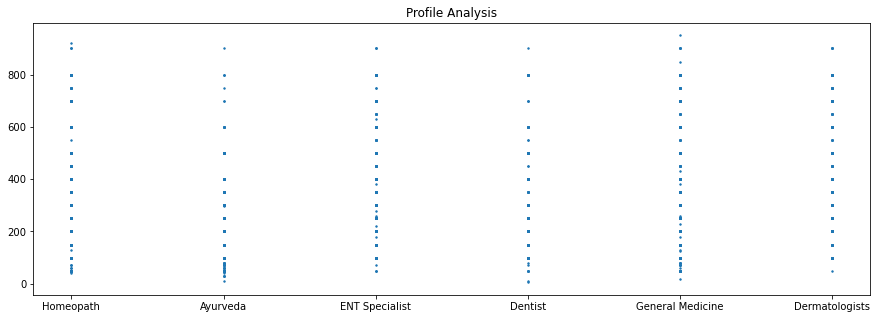

In [466]:
plt.figure(figsize=(15,5))
plt.title('Profile Analysis')

plt.scatter(df['Profile'],df['Fees'],s=2)
plt.show()

We are able to see that General medicine is having a fee ranging from low to high.

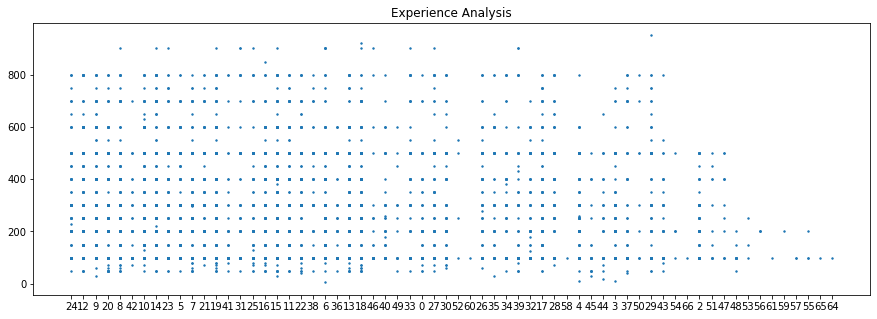

In [467]:
plt.figure(figsize=(15,5))
plt.title('Experience Analysis')

plt.scatter(df['Experience'],df['Fees'],s=2)
plt.show()

Experience is not much correlated with the fee.

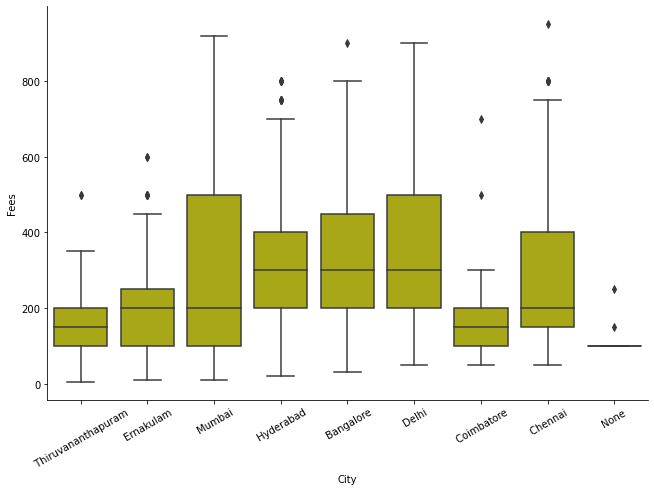

In [468]:
sns.catplot(x='City',y='Fees', data=df.sort_values("Fees"),kind='box',height=6,aspect= 1.5,color='y')
plt.xticks(rotation=30)
plt.show()

As Delhi, Banglore, Hyderabad, Mumbai and Chennai are in list of Tier 1 city so, as usual the doctor consultation fees in these metropolean cities are very high as compared to Tier 2 and Tier 3 city.

In [469]:
df["Rating"] = df["Rating"].cat.codes
dft["Rating"] = dft["Rating"].cat.codes
#changing the caategorical variables so that we can visualise

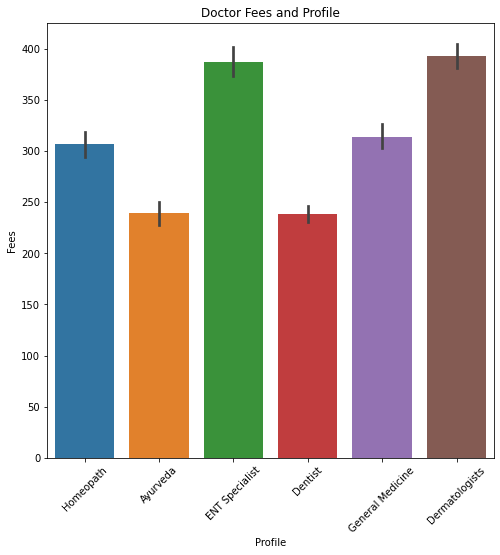

In [470]:
plt.figure(figsize=(8,8))
sns.barplot(x='Profile',y='Fees',data=df)
plt.title("Doctor Fees and Profile")
plt.xticks(rotation=45)
plt.show()

We are able to see here that ENT sp and Dermatologist are having a higher fees compared to others and Ayurveda and dentist being the lowest.

To get better clarification, we have to encode the Experience data.


In [471]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
df['Experience']=enc.fit_transform(df['Experience'].values.reshape(-1,1))

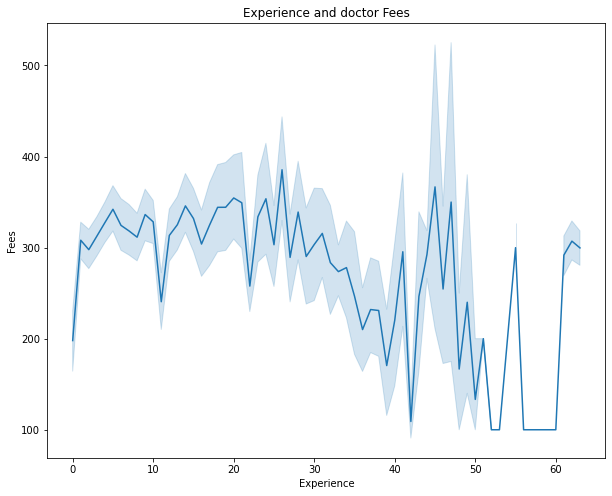

In [472]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Experience',y='Fees',data=df)
ax.set_title("Experience and doctor Fees")
plt.show()

We are able to see here that with the increment in experience we arae able to see a dip in some part after 40's.

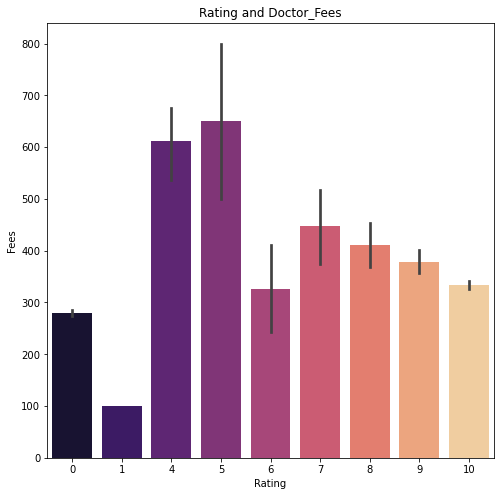

In [473]:
plt.figure(figsize=(8,8))
sns.barplot(x='Rating',y='Fees',data=df,palette='magma')
plt.title("Rating and Doctor_Fees")
plt.show()

Doctors having ratings 5 is having higher fees.

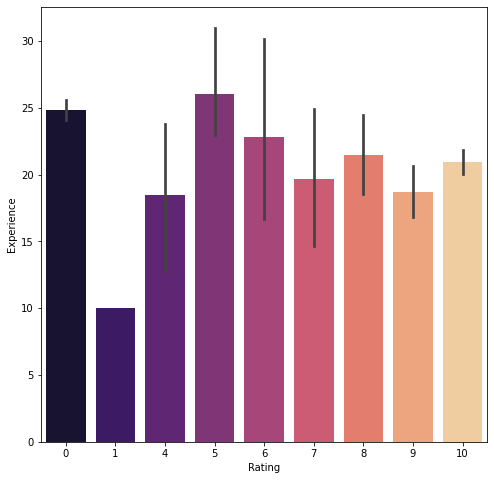

In [474]:
plt.figure(figsize=(8,8))
sns.barplot(x='Rating',y='Experience',data=df,palette='magma')
plt.show()

Ratings for 5 if having higher experience.

Let us encode the data now.

In [475]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
df['Area']=enc.fit_transform(df['Area'].values.reshape(-1,1))
df['Profile']=enc.fit_transform(df['Profile'].values.reshape(-1,1))
df['City']=enc.fit_transform(df['City'].values.reshape(-1,1))

In [476]:
dft['Experience']=enc.fit_transform(dft['Experience'].values.reshape(-1,1))
dft['Area']=enc.fit_transform(dft['Area'].values.reshape(-1,1))
dft['Profile']=enc.fit_transform(dft['Profile'].values.reshape(-1,1))
dft['City']=enc.fit_transform(dft['City'].values.reshape(-1,1))

Have encoded the details in the data

In [477]:
df.dtypes

Experience                                    float64
Rating                                           int8
Profile                                       float64
Fees                                            int64
Area                                          float64
City                                          float64
MBBS                                            int64
BDS                                             int64
BAMS                                            int64
BHMS                                            int64
MD - Dermatology                                int64
MS - ENT                                        int64
Venereology & Leprosy                           int64
MD - General Medicine                           int64
Diploma in Otorhinolaryngology (DLO)            int64
MD - Homeopathy                                 int64
DDVL                                            int64
MD - Ayurveda Medicine                          int64
DDV                         

In [478]:
dft.dtypes

Experience                                    float64
Rating                                           int8
Profile                                       float64
Area                                          float64
City                                          float64
MBBS                                            int64
BDS                                             int64
BAMS                                            int64
BHMS                                            int64
MD - Dermatology                                int64
MS - ENT                                        int64
Venereology & Leprosy                           int64
MD - General Medicine                           int64
Diploma in Otorhinolaryngology (DLO)            int64
MD - Homeopathy                                 int64
DDVL                                            int64
MD - Ayurveda Medicine                          int64
DDV                                             int64
DNB - ENT                   

In [479]:
df.describe()

,Experience,Rating,Profile,Fees,Area,City,MBBS,BDS,BAMS,BHMS,...,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,...,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,23.010904,4.343902,2.441872,307.944640,412.492199,3.079517,0.470559,0.228485,0.127831,0.125482,...,0.068948,0.049153,0.047811,0.041772,0.030364,0.027009,0.023318,0.021641,0.018453,0.017950
std,20.937163,4.865007,1.658014,190.920373,255.656109,2.313018,0.499174,0.419892,0.333929,0.331293,...,0.253387,0.216205,0.213384,0.200083,0.171601,0.162123,0.150925,0.145519,0.134595,0.132781
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,1.000000,150.000000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,0.000000,2.000000,300.000000,410.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,36.000000,10.000000,4.000000,500.000000,623.000000,5.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,63.000000,10.000000,5.000000,950.000000,866.000000,8.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We havae 5961 columns and in that too, ratings ranges from 0-10, highest fees is 950, Experience max is 63 and others are almost categorical.

Correlation

<AxesSubplot:>

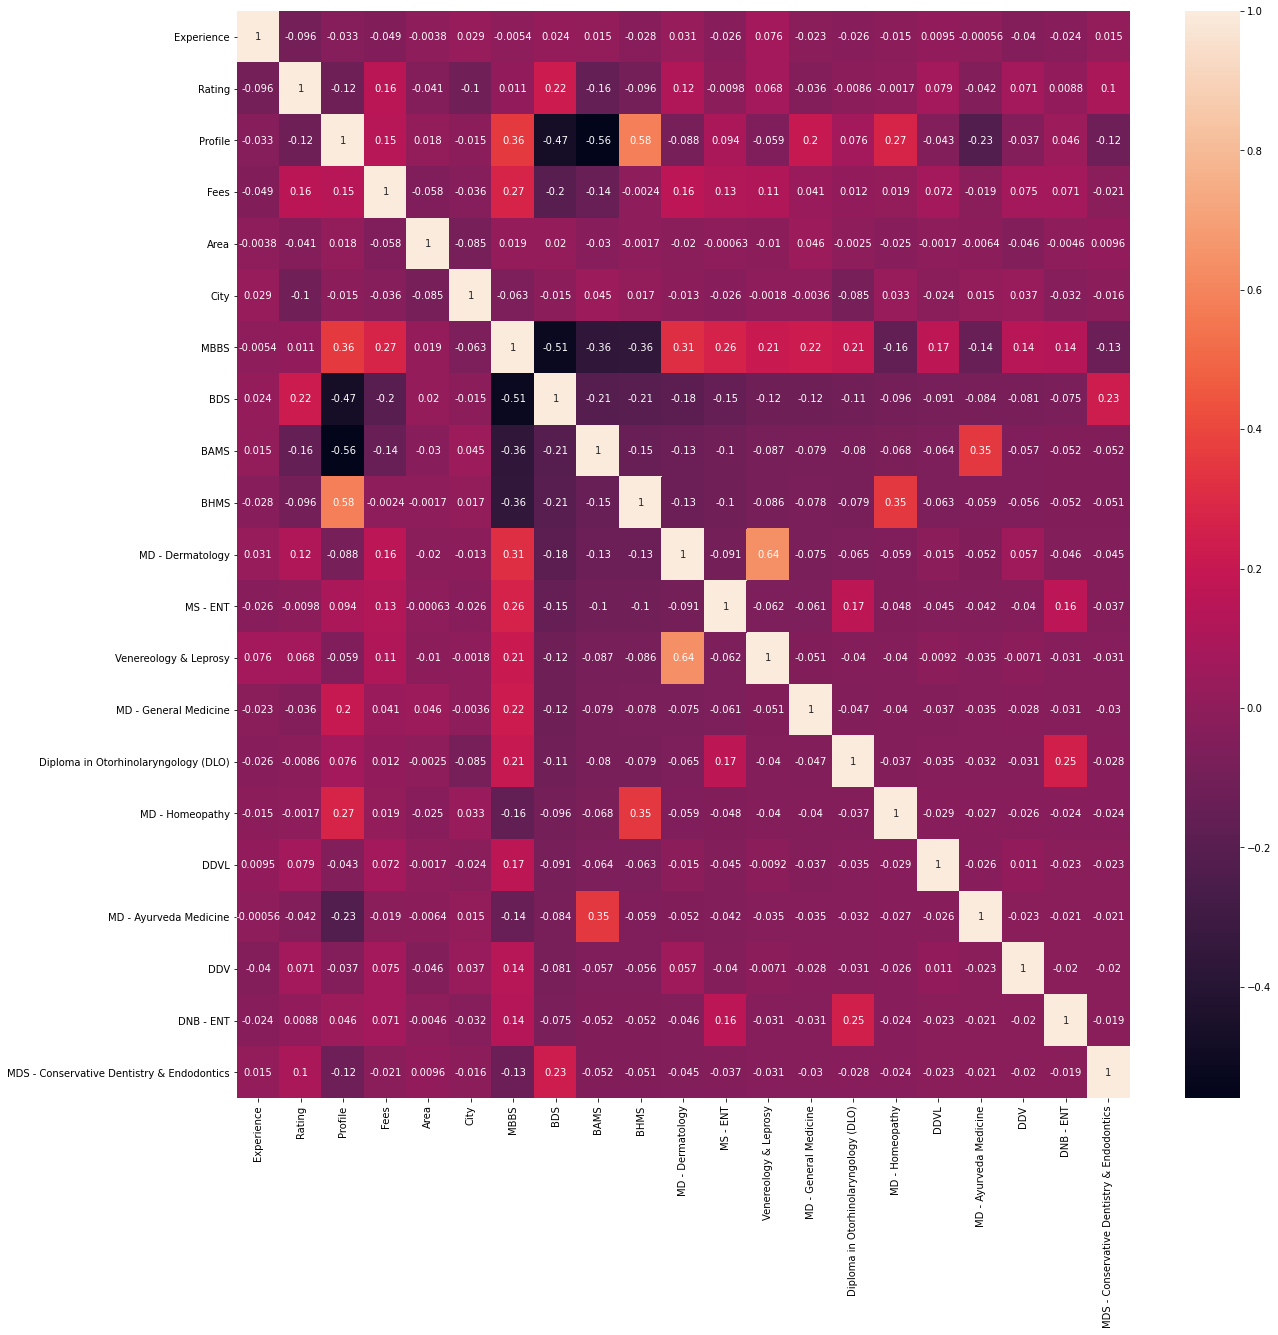

In [480]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

We are able to see correlation between profile and fees and fees and ratings.


Different qualifications are correlated with each other depending on the professional relation and depths.


As we have already analyzed the data, we will continue to split and move ahead with the data.

Let us split the data into x and y.

In [481]:
x=df.drop(columns='Fees')
y=df['Fees']

In [482]:
x.shape

(5961, 20)

In [483]:
x.columns

Index(['Experience', 'Rating', 'Profile', 'Area', 'City', 'MBBS', 'BDS',
       'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy',
       'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)',
       'MD - Homeopathy', 'DDVL', 'MD - Ayurveda Medicine', 'DDV', 'DNB - ENT',
       'MDS - Conservative Dentistry & Endodontics'],
      dtype='object')

In [484]:
col=['Experience', 'Rating', 'Profile', 'Area', 'City', 'MBBS', 'BDS',
       'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy',
       'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)',
       'MD - Homeopathy', 'DDVL', 'MD - Ayurveda Medicine', 'DDV', 'DNB - ENT',
       'MDS - Conservative Dentistry & Endodontics']

In [485]:
y.shape


(5961,)

In [486]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

x = pd.DataFrame(x, columns = col)
x

,Experience,Rating,Profile,Area,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,DDVL,MD - Ayurveda Medicine,DDV,DNB - ENT,MDS - Conservative Dentistry & Endodontics
0,-0.334883,1.162706,1.543016,-0.451786,0.397991,-0.942753,-0.544198,-0.382840,2.639934,-0.336091,-0.272129,-0.227363,-0.224079,-0.208788,5.650991,-0.166609,-0.154515,-0.148726,-0.137114,-0.135197
1,-0.955840,1.162706,-1.472893,1.738840,-1.331496,-0.942753,-0.544198,2.612056,-0.378797,-0.336091,-0.272129,-0.227363,-0.224079,-0.208788,-0.176960,-0.166609,6.471854,-0.148726,-0.137114,-0.135197
2,1.910118,-0.892962,0.336652,0.158460,-1.331496,1.060723,-0.544198,-0.382840,-0.378797,-0.336091,-0.272129,-0.227363,-0.224079,-0.208788,-0.176960,-0.166609,-0.154515,-0.148726,-0.137114,-0.135197
3,-0.955840,-0.892962,-1.472893,-1.347596,-1.331496,-0.942753,-0.544198,2.612056,-0.378797,-0.336091,-0.272129,-0.227363,-0.224079,-0.208788,-0.176960,-0.166609,-0.154515,-0.148726,-0.137114,-0.135197
4,-0.525947,1.162706,-1.472893,-0.299225,-0.899125,-0.942753,-0.544198,2.612056,-0.378797,-0.336091,-0.272129,-0.227363,-0.224079,-0.208788,-0.176960,-0.166609,-0.154515,-0.148726,-0.137114,-0.135197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,-0.621478,1.162706,0.336652,-1.339772,-1.331496,1.060723,-0.544198,-0.382840,-0.378797,-0.336091,3.674731,-0.227363,-0.224079,-0.208788,-0.176960,-0.166609,-0.154515,-0.148726,-0.137114,-0.135197
5957,0.142777,-0.892962,0.939834,0.487054,-0.899125,1.060723,-0.544198,-0.382840,-0.378797,-0.336091,-0.272129,-0.227363,-0.224079,-0.208788,-0.176960,-0.166609,-0.154515,-0.148726,-0.137114,-0.135197
5958,0.572671,1.162706,0.939834,-0.768645,-0.034381,1.060723,-0.544198,-0.382840,-0.378797,-0.336091,-0.272129,-0.227363,-0.224079,-0.208788,-0.176960,-0.166609,-0.154515,-0.148726,-0.137114,-0.135197
5959,-0.812542,0.957139,0.939834,1.680163,1.262735,1.060723,-0.544198,-0.382840,-0.378797,-0.336091,-0.272129,-0.227363,4.462711,-0.208788,-0.176960,-0.166609,-0.154515,-0.148726,-0.137114,-0.135197


Almost, all the daata that we have is categoricaal where checking for outliers will not be relevant hence not checking for outliers in the data.

Modelling

In [487]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.30,random_state=25)

Not using for loop for test and random state as we usually work on getting the best random state and use that for other models as well, however there is a possibility the the random value chanage with the model we use to get the best random state or test size hence not using that and assuming mostly used 30 7- split for test and a random value for random state as I presume that it might not bring a big difference in the data.

In [488]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [489]:
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
ls = Lasso()
rd = Ridge()
eln = ElasticNet()

In [497]:
model = [lr,dtr, svr,knr, ls, rd,rfr, eln]
for m in model:
    print(m)
    m.fit(x_train, y_train)
    a = m.score(x_train, y_train)
    pred_train=m.predict(x_train)
    pred = m.predict(x_test)
    print('Score: ', a)
    print('Accuracy score for the training : ',r2_score(y_train,pred_train))
    print('Mean absolute error: ', mean_absolute_error(y_test,pred))
    print('Mean squared error: ', mean_squared_error(y_test,pred))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score: ', r2_score(y_test,pred))
    print('\n\n')

LinearRegression()
Score:  0.12742286716453688
Accuracy score for the training :  0.12742286716453688
Mean absolute error:  141.38086971941678
Mean squared error:  30232.143214477215
Root mean squared error:  173.8739290821865
R2 Score:  0.15739061474607907



DecisionTreeRegressor()
Score:  0.9940392965215148
Accuracy score for the training :  0.9940392965215148
Mean absolute error:  170.70057760387556
Mean squared error:  56677.538662194886
Root mean squared error:  238.07044894777445
R2 Score:  -0.5796771559016711



SVR()
Score:  0.05195046635871814
Accuracy score for the training :  0.05195046635871814
Mean absolute error:  142.91973088661425
Mean squared error:  32860.154741547085
Root mean squared error:  181.27370118565761
R2 Score:  0.084144495158892



KNeighborsRegressor()
Score:  0.3434241567445452
Accuracy score for the training :  0.3434241567445452
Mean absolute error:  143.1929569591951
Mean squared error:  34125.19349357182
Root mean squared error:  184.73005573964357


In [501]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
model = [lr,dtr, svr,knr, ls, rd,rfr, eln]
for m in model:
    print('The model is: \n',m)
    for j in range (2,10):
        test_accuracy = r2_score(y_test, pred)
        cv_score = cross_val_score(m, x, y, cv = j)
        cv_mean = cv_score.mean()
        print(f'At cross fold {j} the cv score is {cv_mean}')
        print('\n\n')

The model is: 
 LinearRegression()
At cross fold 2 the cv score is 0.12844455132172844



At cross fold 3 the cv score is 0.12947424866145332



At cross fold 4 the cv score is 0.1318989966819033



At cross fold 5 the cv score is 0.12878997557647978



At cross fold 6 the cv score is 0.12768635535600967



At cross fold 7 the cv score is 0.12941608687292352



At cross fold 8 the cv score is 0.12936796449127008



At cross fold 9 the cv score is 0.12819710362090742



The model is: 
 DecisionTreeRegressor()
At cross fold 2 the cv score is -0.5197404603864474



At cross fold 3 the cv score is -0.5446455505881068



At cross fold 4 the cv score is -0.5259132632129612



At cross fold 5 the cv score is -0.47479531560448096



At cross fold 6 the cv score is -0.5426845178572314



At cross fold 7 the cv score is -0.4896019156589162



At cross fold 8 the cv score is -0.4863455018639362



At cross fold 9 the cv score is -0.4917887091933733



The model is: 
 SVR()
At cross fold 2 the cv 

Looking at the daata, we can fix that dt is the best model that we can find with least difference in the data.

In [520]:
dtr.fit(x_train, y_train)
a = dtr.score(x_train, y_train)
pred_train = dtr.predict(x_train)
pred_test_dtr =dtr.predict(x_test)


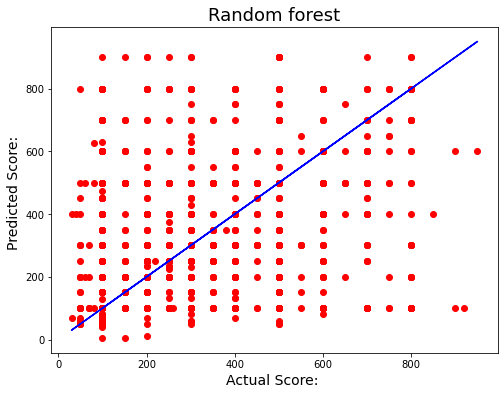

In [521]:
plt.figure(figsize = (8,6))
plt.scatter(x = y_test, y = pred_test_dtr, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual Score: ', fontsize = 14)
plt.ylabel('Predicted Score: ', fontsize = 14)
plt.title('Random forest', fontsize = 18)
plt.show()

In [534]:
param = {'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],'splitter':['best', 'random'],'max_features':['log2','auto','sqrt']}

modeldtr = DecisionTreeRegressor()

grids = GridSearchCV(modeldtr,param,cv=2)


grid_result = grids.fit(x_train, y_train)


print(grids.best_params_)

print('Best Score: ', grid_result.best_score_)

{'criterion': 'mae', 'max_features': 'sqrt', 'splitter': 'random'}
Best Score:  -0.19733984787624326


In [536]:
dtr=DecisionTreeRegressor(criterion='mae',max_features='sqrt',splitter='random')

In [537]:
dtr.fit(x_train, y_train)
dtr.score(x_train, y_train)
preddtr = dtr.predict(x_test)
data = [preddtr, y_test]
pd.DataFrame(data, index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,...,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788
Predicted,100.0,200.0,350.0,300.0,200.0,200.0,800.0,300.0,600.0,100.0,...,350.0,200.0,200.0,200.0,350.0,100.0,600.0,600.0,200.0,100.0
Actual,100.0,200.0,400.0,400.0,100.0,500.0,400.0,200.0,100.0,100.0,...,450.0,200.0,100.0,300.0,200.0,300.0,600.0,600.0,100.0,800.0


In [538]:
print('Errors:')
print('\n')
print('Mean absolute error: ', mean_absolute_error(y_test,predsvr))
print('Mean squared error: ', mean_squared_error(y_test,predsvr))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,predsvr)))
print('\n')
print('R2 Score: ', r2_score(y_test,predsvr))

Errors:


Mean absolute error:  137.44137362774225
Mean squared error:  31077.491199751243
Root mean squared error:  176.2880914859289


R2 Score:  0.1338296603954695


Its a pretty low score, the probable reason that we can find could be the split in the data that we have made from Qualification.

Saving the model

In [539]:
joblib.dump(dtr, 'feedtr.obj')

['feedtr.obj']

Reimporting the model

In [540]:
testing=joblib.load('feedtr.obj')

In [541]:
testprediction=testing.predict(dft)

In [542]:
pd.DataFrame(testprediction)

,0
0,100.0
1,100.0
2,100.0
3,500.0
4,100.0
...,...
1982,550.0
1983,100.0
1984,100.0
1985,100.0
